In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('Google-Playstore.csv')
df.head()


,App Name,App Id,Category,Rating,Rating Count,Installs,Minimum Installs,Maximum Installs,Free,Price,...,Developer Website,Developer Email,Released,Last Updated,Content Rating,Privacy Policy,Ad Supported,In App Purchases,Editors Choice,Scraped Time
0,Gakondo,com.ishakwe.gakondo,Adventure,0.0,0.0,10+,10.0,15,True,0.0,...,https://beniyizibyose.tk/#/,jean21101999@gmail.com,"Feb 26, 2020","Feb 26, 2020",Everyone,https://beniyizibyose.tk/projects/,False,False,False,2021-06-15 20:19:35
1,Ampere Battery Info,com.webserveis.batteryinfo,Tools,4.4,64.0,"5,000+",5000.0,7662,True,0.0,...,https://webserveis.netlify.app/,webserveis@gmail.com,"May 21, 2020","May 06, 2021",Everyone,https://dev4phones.wordpress.com/licencia-de-uso/,True,False,False,2021-06-15 20:19:35
2,Vibook,com.doantiepvien.crm,Productivity,0.0,0.0,50+,50.0,58,True,0.0,...,NaN,vnacrewit@gmail.com,"Aug 9, 2019","Aug 19, 2019",Everyone,https://www.vietnamairlines.com/vn/en/terms-an...,False,False,False,2021-06-15 20:19:35
3,Smart City Trichy Public Service Vehicles 17UC...,cst.stJoseph.ug17ucs548,Communication,5.0,5.0,10+,10.0,19,True,0.0,...,http://www.climatesmarttech.com/,climatesmarttech2@gmail.com,"Sep 10, 2018","Oct 13, 2018",Everyone,NaN,True,False,False,2021-06-15 20:19:35
4,GROW.me,com.horodyski.grower,Tools,0.0,0.0,100+,100.0,478,True,0.0,...,http://www.horodyski.com.pl,rmilekhorodyski@gmail.com,"Feb 21, 2020","Nov 12, 2018",Everyone,http://www.horodyski.com.pl,False,False,False,2021-06-15 20:19:35


I. Data cleaning \
The data was originally scraped from Google Playstore and was still in raw format. First and foremost, we need to clean the data before proceeding to perform EDA. There are unnecessary columns such as App Id, Developer Id, Developer Website, Developer Email, Privacy Policy, Scraped Time. So, we'll remove them from the dataset. Also, there are 3 Installs columns in the dataset, only the Maximum Installs is the actual count of installs, so we'll keep this column, rename it and remove the other two.

In [2]:
cleaned_df = df.drop(columns=["App Id", "Minimum Android", "Developer Id", "Developer Website", "Developer Email", "Installs", "Minimum Installs", "Privacy Policy", "Scraped Time"])
cleaned_df.rename(columns = {'Maximum Installs':'Installs'}, inplace=True)
#Popularity = ["Unlikely", "Likely"], going to have a score (1-10) and bin it
cleaned_df["Popularity"] = "Unlikely" 
cleaned_df.head()

,App Name,Category,Rating,Rating Count,Installs,Free,Price,Currency,Size,Released,Last Updated,Content Rating,Ad Supported,In App Purchases,Editors Choice,Popularity
0,Gakondo,Adventure,0.0,0.0,15,True,0.0,USD,10M,"Feb 26, 2020","Feb 26, 2020",Everyone,False,False,False,Unlikely
1,Ampere Battery Info,Tools,4.4,64.0,7662,True,0.0,USD,2.9M,"May 21, 2020","May 06, 2021",Everyone,True,False,False,Unlikely
2,Vibook,Productivity,0.0,0.0,58,True,0.0,USD,3.7M,"Aug 9, 2019","Aug 19, 2019",Everyone,False,False,False,Unlikely
3,Smart City Trichy Public Service Vehicles 17UC...,Communication,5.0,5.0,19,True,0.0,USD,1.8M,"Sep 10, 2018","Oct 13, 2018",Everyone,True,False,False,Unlikely
4,GROW.me,Tools,0.0,0.0,478,True,0.0,USD,6.2M,"Feb 21, 2020","Nov 12, 2018",Everyone,False,False,False,Unlikely


The size column is in str format since there are letters M, G, k in the value. So we fix it:

In [3]:
def clean_size(x):
  x = str(x).replace(',', '')
  if 'M' in x:
    x = float(x.strip('M'))
    x *= 1024
  elif 'G' in x:
    x = float(x.strip('G'))
    x *= 1024 * 1024
  elif 'k' in x:
    x = float(x.strip('k'))
  else:
    x = 'NA'
  return x
cleaned_df['Size'] = cleaned_df['Size'].map(clean_size)
cleaned_df[cleaned_df['Size'] == 'NA'].shape

(74973, 16)

There are 74973 rows with missing values from the Size feature, which accounts for only 74973 / 2312944 * 100 = 3.24% total rows. So, we'll simply drop those rows since we don't have enough features that can help represents the size of the app using other ML techniques.

In [4]:
cleaned_df = cleaned_df[cleaned_df['Size'] != 'NA']
cleaned_df['Size'] = pd.to_numeric(cleaned_df['Size'])
cleaned_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2237971 entries, 0 to 2312943
Data columns (total 16 columns):
 #   Column            Dtype  
---  ------            -----  
 0   App Name          object 
 1   Category          object 
 2   Rating            float64
 3   Rating Count      float64
 4   Installs          int64  
 5   Free              bool   
 6   Price             float64
 7   Currency          object 
 8   Size              float64
 9   Released          object 
 10  Last Updated      object 
 11  Content Rating    object 
 12  Ad Supported      bool   
 13  In App Purchases  bool   
 14  Editors Choice    bool   
 15  Popularity        object 
dtypes: bool(4), float64(4), int64(1), object(7)
memory usage: 230.5+ MB


In [5]:
cleaned_df["Category"].astype(str)


0              Adventure
1                  Tools
2           Productivity
3          Communication
4                  Tools
               ...      
2312939     Role Playing
2312940        Education
2312941        Education
2312942    Music & Audio
2312943           Trivia
Name: Category, Length: 2237971, dtype: object

In [6]:
cleaned_df.drop(columns="Last Updated", axis=1, inplace=True)

In [7]:
cleaned_df.dropna(inplace=True)
cleaned_df.drop(columns=['Released', 'App Name'], inplace=True, axis=1)
cleaned_df.head()

,Category,Rating,Rating Count,Installs,Free,Price,Currency,Size,Content Rating,Ad Supported,In App Purchases,Editors Choice,Popularity
0,Adventure,0.0,0.0,15,True,0.0,USD,10240.0,Everyone,False,False,False,Unlikely
1,Tools,4.4,64.0,7662,True,0.0,USD,2969.6,Everyone,True,False,False,Unlikely
2,Productivity,0.0,0.0,58,True,0.0,USD,3788.8,Everyone,False,False,False,Unlikely
3,Communication,5.0,5.0,19,True,0.0,USD,1843.2,Everyone,True,False,False,Unlikely
4,Tools,0.0,0.0,478,True,0.0,USD,6348.8,Everyone,False,False,False,Unlikely


In [8]:
cleaned_df['Score'] = 0

# cleaned_df.drop(columns='App Name', inplace=True)
#rating score
cleaned_df['Popularity'].astype(str)
cleaned_df.loc[cleaned_df['Rating'] >=2.5, 'Score'] += 1
cleaned_df.loc[cleaned_df['Rating Count'] >= cleaned_df['Rating Count'].median(), 'Score'] += 1
cleaned_df.loc[cleaned_df['Installs'] >= cleaned_df['Installs'].median(), 'Score'] += 1
cleaned_df.loc[cleaned_df['Free'] == True, 'Score'] += 1
cleaned_df.loc[cleaned_df['Size'] <= cleaned_df['Size'].median(), 'Score'] += 1
cleaned_df.loc[cleaned_df['Ad Supported'] == False, 'Score'] += 1
cleaned_df.loc[cleaned_df['Editors Choice'] == True, 'Score'] += 1
cleaned_df.loc[cleaned_df['Score'] > 3 , 'Popularity'] = 'Likely'
cleaned_df.head()

,Category,Rating,Rating Count,Installs,Free,Price,Currency,Size,Content Rating,Ad Supported,In App Purchases,Editors Choice,Popularity,Score
0,Adventure,0.0,0.0,15,True,0.0,USD,10240.0,Everyone,False,False,False,Unlikely,3
1,Tools,4.4,64.0,7662,True,0.0,USD,2969.6,Everyone,True,False,False,Likely,5
2,Productivity,0.0,0.0,58,True,0.0,USD,3788.8,Everyone,False,False,False,Unlikely,3
3,Communication,5.0,5.0,19,True,0.0,USD,1843.2,Everyone,True,False,False,Unlikely,3
4,Tools,0.0,0.0,478,True,0.0,USD,6348.8,Everyone,False,False,False,Unlikely,3


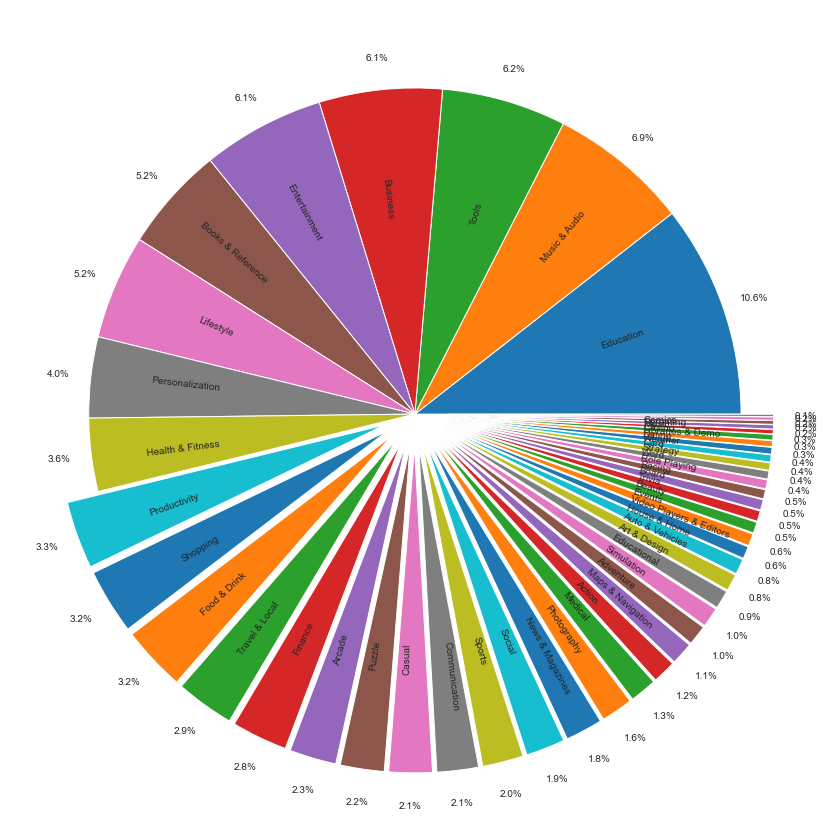

In [9]:
from matplotlib import rcParams
rcParams['figure.figsize'] = 20, 15
sns.set_style('darkgrid')

category_labels = cleaned_df['Category'].value_counts().index

explode = []
for i in range(len(cleaned_df['Category'].value_counts().index)):
  if i > 8:
    explode.append(0.1)
  else:
    explode.append(0)

plt.pie(cleaned_df['Category'].value_counts().values, labels=category_labels, rotatelabels=True, labeldistance=0.6, autopct='%1.1f%%', explode=explode, pctdistance=1.1)

plt.show()

In [10]:
cleaned_df.groupby('Category')['Rating'].mean()

Category
Action                     2.677332
Adventure                  2.783463
Arcade                     2.432866
Art & Design               1.953497
Auto & Vehicles            2.027992
Beauty                     1.413735
Board                      2.749136
Books & Reference          2.445919
Business                   1.415158
Card                       3.028874
Casino                     3.249059
Casual                     2.395698
Comics                     2.813349
Communication              2.110351
Dating                     2.458233
Education                  2.233903
Educational                2.416331
Entertainment              2.415816
Events                     1.276928
Finance                    2.376226
Food & Drink               1.278595
Health & Fitness           1.597676
House & Home               1.464208
Libraries & Demo           2.104499
Lifestyle                  1.904835
Maps & Navigation          2.185434
Medical                    1.843105
Music              

<AxesSubplot:xlabel='Size', ylabel='Installs'>

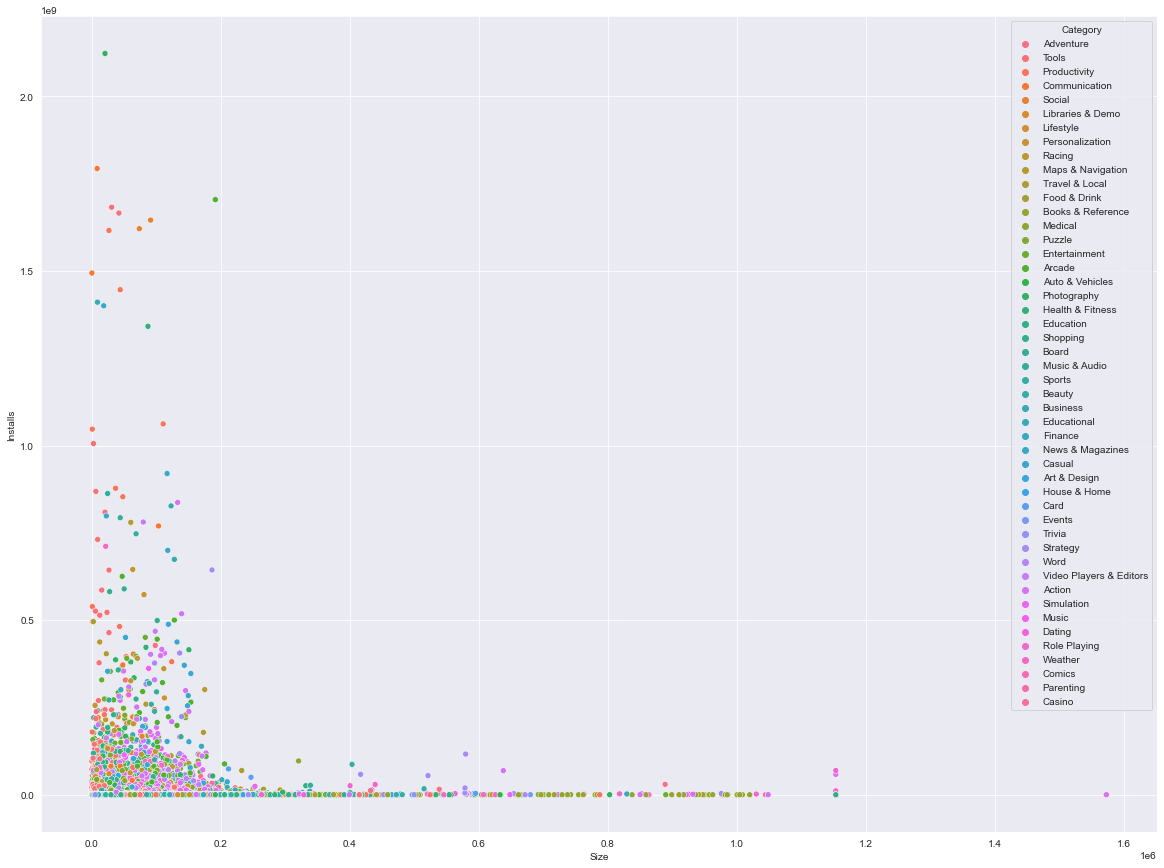

In [11]:
sns.scatterplot(data=cleaned_df, x='Size', y='Installs', hue='Category')

In [12]:
cleaned_df.columns

Index(['Category', 'Rating', 'Rating Count', 'Installs', 'Free', 'Price',
       'Currency', 'Size', 'Content Rating', 'Ad Supported',
       'In App Purchases', 'Editors Choice', 'Popularity', 'Score'],
      dtype='object')

<AxesSubplot:>

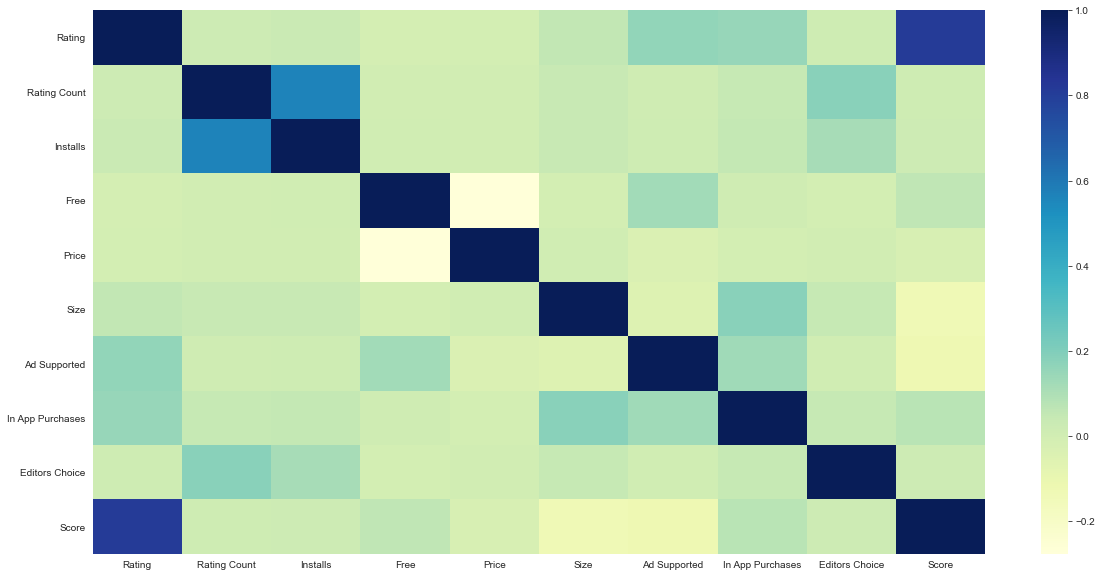

In [13]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(20,10))
# cleaned_df = pd.get_dummies(data = cleaned_df, columns=['Category', 'Content Rating', 'Currency'], drop_first = True)
sns.heatmap(cleaned_df.corr(), annot=False, cmap='YlGnBu')

In [14]:
cleaned_df.drop_duplicates(keep=False, inplace=True)

In [15]:
cleaned_df.value_counts()

Category          Rating  Rating Count  Installs  Free   Price  Currency  Size     Content Rating  Ad Supported  In App Purchases  Editors Choice  Popularity  Score
Action            0.0     0.0           0         False  0.99   USD       5632.0   Everyone        False         False             False           Unlikely    2        1
News & Magazines  4.7     26.0          163       True   0.00   USD       2355.2   Everyone        False         False             False           Likely      5        1
                                        1801      True   0.00   USD       35840.0  Everyone        False         False             False           Likely      5        1
                                        1636      True   0.00   USD       62464.0  Everyone        True          False             False           Likely      4        1
                                        1540      True   0.00   USD       8908.8   Everyone        True          False             False           Likely  

In [18]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

category_encode = le.fit_transform(cleaned_df['Category'])
content_encode = le.fit_transform(cleaned_df['Content Rating'])
editor_encode = le.fit_transform(cleaned_df['Editors Choice'])
Ad_endcode = le.fit_transform(cleaned_df['Ad Supported'])
purchase_encode = le.fit_transform(cleaned_df['In App Purchases'])
free_encode = le.fit_transform(cleaned_df['Free'])
currency_encode = le.fit_transform(cleaned_df['Currency'])

target = le.fit_transform(cleaned_df['Popularity'])

features=list(zip(category_encode,cleaned_df['Rating'], cleaned_df['Rating Count'], cleaned_df['Installs'],free_encode, cleaned_df['Price'],currency_encode, cleaned_df['Size'], content_encode, Ad_endcode, purchase_encode, editor_encode, cleaned_df['Score']))

In [19]:
from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

X_train, X_test, y_train, y_test = train_test_split(features,target,test_size=0.3, random_state=42)


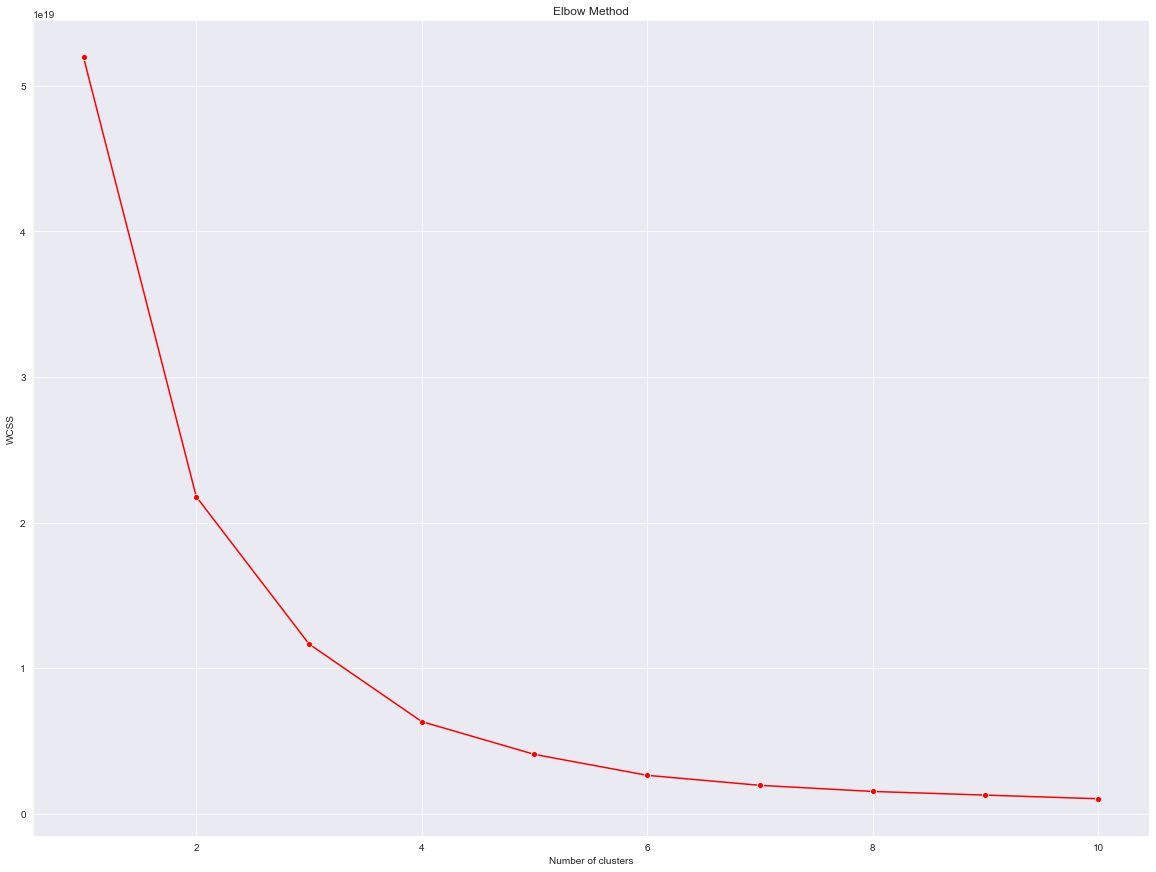

In [19]:

wcss = []
# X_train = cleaned_df.drop('Popularity', axis=1)
# y_train = cleaned_df['Popularity']

for i in range(1, 11):

    kmeans = KMeans(n_clusters = i, random_state = 42)
    kmeans.fit(X_train)
    wcss.append(kmeans.inertia_)

sns.lineplot(x=range(1, 11), y=wcss,marker='o',color='red')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [21]:
knn = KNeighborsClassifier(n_neighbors=4)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

In [22]:
print("Accuracy:",metrics.accuracy_score(y_pred,y_test))

Accuracy: 0.9243361429981874


In [20]:
le = preprocessing.LabelEncoder()

rfc_features=list(zip(category_encode,cleaned_df['Rating'], cleaned_df['Rating Count'], cleaned_df['Installs'],free_encode, cleaned_df['Price'],currency_encode, cleaned_df['Size'], content_encode, Ad_endcode, purchase_encode, editor_encode))

In [21]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

X_scaled = scaler.fit_transform(rfc_features)
X_scaled = pd.DataFrame(data=X_scaled, columns=cleaned_df.drop(['Score', 'Popularity'], axis=1).columns)

X_train, X_test, y_train, y_test = train_test_split(X_scaled,target,test_size=0.3, random_state=0)



In [42]:
from sklearn.tree import DecisionTreeClassifier

clf_gini = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=0)

clf_gini.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=0)

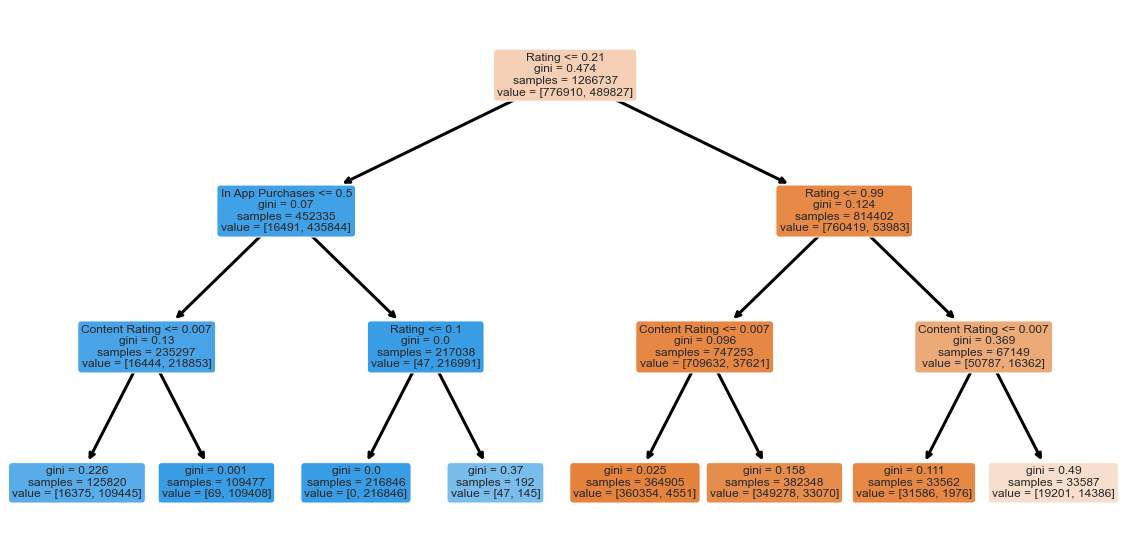

In [46]:
from sklearn import tree


fig, ax = plt.subplots(figsize=(20, 10))
out = tree.plot_tree(clf_gini, filled=True, rounded=True,
feature_names=['Category', 'Rating', 'Rating Count', 'Installs', 'Free', 'Price', 'Size', 'Content Rating', 'Ad supported', 'In App Purchases', 'Editors Choice'], fontsize=12)
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor('black')
        arrow.set_linewidth(3)

In [24]:
RFC = RandomForestClassifier(n_estimators=100, random_state=42, oob_score=True)
RFC.fit(X_train, y_train)
RFC_pred = RFC.predict(X_test)

In [25]:
print("Accuracy:",metrics.accuracy_score(y_test , RFC_pred))

Accuracy: 0.9639244190330234


In [26]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.neural_network import MLPClassifier
from sklearn.neural_network import MLPRegressor

X = features
Y = target

scaler = StandardScaler()
X_scaled=scaler.fit_transform(X)
X = pd.DataFrame(data=X_scaled, columns=cleaned_df.drop(['Popularity'], axis=1).columns)

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state= 42)

In [27]:
parameters = {'activation' : ['relu'], 'solver' :['lbfgs', 'sgd', 'adam'], 'alpha' :[0.01, 0.001, 1], 'learning_rate' : ['adaptive'], 'max_iter' : [25, 50, 100], 'hidden_layer_sizes' : [64, 32, 16], 'random_state' : [42]}

In [28]:
mlp = MLPClassifier()
search = GridSearchCV(estimator=mlp, param_grid=parameters, verbose = 3, refit=True, n_jobs = 6)
search.fit(x_train, y_train)

print('Best Parameters:', search.best_params_)


Fitting 5 folds for each of 81 candidates, totalling 405 fits


In [40]:
mlp = MLPClassifier(activation='relu', alpha=0.01, hidden_layer_sizes=64, learning_rate='adaptive', max_iter=3000, random_state=42, solver='lbfgs')
mlp.fit(x_train, y_train)
pred = mlp.predict(x_test)

In [41]:
print()
print('Accuracy Score : ' + str(metrics.accuracy_score(y_test,pred)))
print()
print(confusion_matrix(y_test,pred))
print()
print(classification_report(y_test,pred))



Accuracy Score : 1.0

[[333970      0]
 [     0 208918]]

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    333970
           1       1.00      1.00      1.00    208918

    accuracy                           1.00    542888
   macro avg       1.00      1.00      1.00    542888
weighted avg       1.00      1.00      1.00    542888

